# Newton-Raphson

In [70]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return x**3-4*x-9
def f_prime(x):
    return 3*x**2-4
def newton(x,tol=1e-5):
    if abs(f(x))<tol:
        return x
    else:
        return newton(x-f(x)/f_prime(x),tol)
root=newton(2.5)
print("Root =", root)
#x=np.linspace(1,4,100)

Root = 2.7065279765747587


Root = 2.7065279765747587


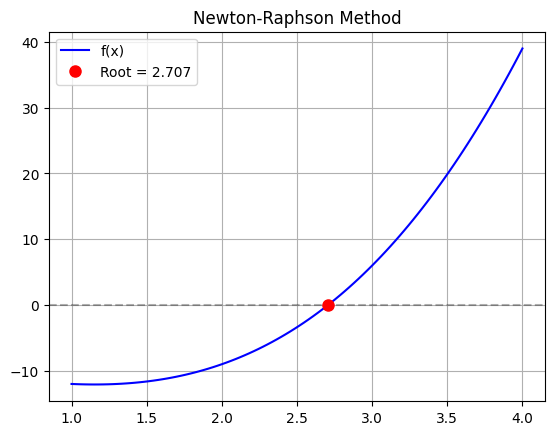

In [71]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 - 4*x - 9

def f_prime(x):
    return 3*x**2 - 4

def newton(x, tol=1e-5):
    if abs(f(x)) < tol:          # Base case: root found
        return x
    else:
        return newton(x - f(x)/f_prime(x), tol)  # Recursive call

root = newton(2.5)
print("Root =", root)

# Quick plot
x = np.linspace(1, 4, 100)
y = f(x)
plt.plot(x, y, 'b-', label='f(x)')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.plot(root, 0, 'ro', markersize=8, label=f'Root = {root:.3f}')
plt.grid(True)
plt.legend()
plt.title('Newton-Raphson Method')
plt.show()

# Fixed Point Iteration

Root = 2.706526563673374


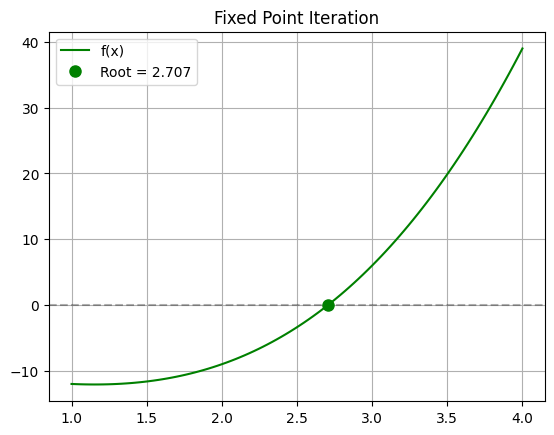

In [72]:
def g(x):
    return ((9 + 4*x)**(1/3))  # Example: x = g(x) => x^3 - 4x - 9 = 0

def fixed_point(x, tol=1e-5):
    if abs(x - g(x)) < tol:   # Base case: convergence
        return g(x)
    else:
        return fixed_point(g(x), tol)  # Recursive call

root = fixed_point(2.5)
print("Root =", root)

# Quick plot
x = np.linspace(1, 4, 100)
y = f(x)
plt.plot(x, y, 'g-', label='f(x)')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.plot(root, 0, 'go', markersize=8, label=f'Root = {root:.3f}')
plt.grid(True)
plt.legend()
plt.title('Fixed Point Iteration')
plt.show()

# Bisection Method

Root = 2.7065277099609375
Bisection Root = 2.706528


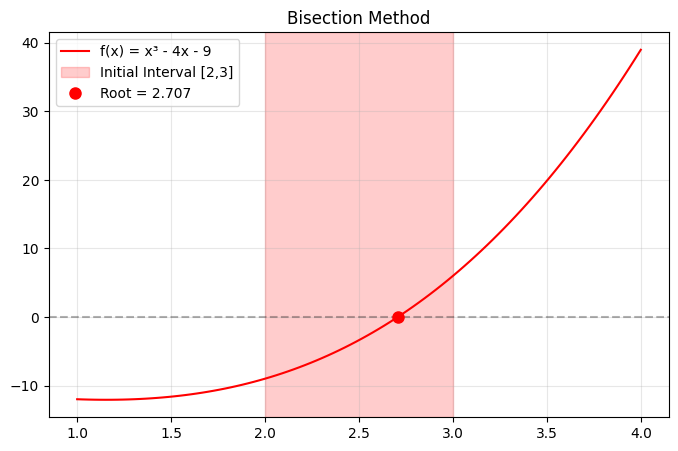

In [73]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return x**3 - 4*x - 9

def Bisection(a, b, tol):
    # Check if root exists in interval
    if f(a) * f(b) > 0:
        print("No root in this interval.")
        return None

    c = (a + b) / 2

    if abs(f(c)) < tol:
        return c
    elif f(a) * f(c) < 0:
        return Bisection(a, c, tol)
    else:
        return Bisection(c, b, tol)

root = Bisection(2, 3, 0.0001)
print("Root =", root)
print(f"Bisection Root = {root:.6f}")

# Quick plot
x = np.linspace(1, 4, 100)
y = f(x)
plt.figure(figsize=(8, 5))
plt.plot(x, y, 'r-', label='f(x) = x³ - 4x - 9')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvspan(2, 3, alpha=0.2, color='red', label='Initial Interval [2,3]')
plt.plot(root, 0, 'ro', markersize=8, label=f'Root = {root:.3f}')
plt.grid(True, alpha=0.3)
plt.legend()
plt.title('Bisection Method')
plt.show()

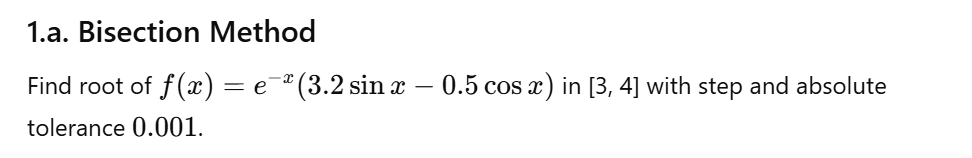

          a         b         c      f(c)
0  3.000000  4.000000  3.500000 -0.019757
1  3.000000  3.500000  3.250000  0.005849
2  3.250000  3.500000  3.375000 -0.008681
3  3.250000  3.375000  3.312500 -0.001877
4  3.250000  3.312500  3.281250  0.001867
5  3.281250  3.312500  3.296875 -0.000034
6  3.281250  3.296875  3.289062  0.000909
7  3.289062  3.296875  3.292969  0.000436
8  3.292969  3.296875  3.294922  0.000200


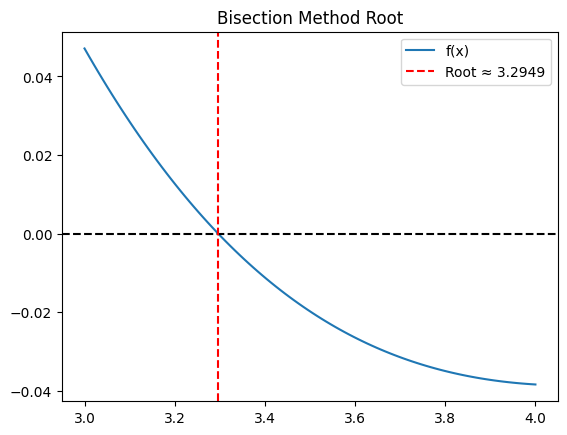

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Function
def f(x):
    return np.exp(-x) * (3.2*np.sin(x) - 0.5*np.cos(x))

# Bisection Method
a, b = 3, 4
eps_step = 0.001
eps_abs = 0.001

results = []

while (b-a)/2 > eps_abs:
    c = (a+b)/2
    fc = f(c)
    results.append([a, b, c, fc])
    if f(a)*fc < 0:
        b = c
    else:
        a = c

# Tabular results
import pandas as pd
df = pd.DataFrame(results, columns=['a','b','c','f(c)'])
print(df)

# Plot function and root
x = np.linspace(3,4,100)
plt.plot(x, f(x), label='f(x)')
plt.axhline(0, color='k', linestyle='--')
plt.axvline(c, color='r', linestyle='--', label=f'Root ≈ {c:.4f}')
plt.legend()
plt.title("Bisection Method Root")
plt.show()


# False Position Method

In [75]:
def false_position(a, b, tol=1e-5):
    # Check if root exists in interval
    if f(a) * f(b) > 0:
        print("No root in this interval.")
        return None
        
    c = (a*f(b) - b*f(a)) / (f(b) - f(a))  # Regula Falsi formula

    if abs(f(c)) < tol:        # Root found
        return c
    elif f(a)*f(c) < 0:        # Root in left side
        return false_position(a, c, tol)
    else:                      # Root in right side
        return false_position(c, b, tol)

root = false_position(2, 3)

# Safely handle case where no root was found (root is None)
if root is None:
    print("No root found in interval [2, 3] for the current function 'f'.")
    print("Please choose an interval where f(a) and f(b) have opposite signs.")
else:
    print("Root =", root)

    # Quick plot
    x = np.linspace(1, 4, 100)
    y = f(x)
    plt.plot(x, y, 'm-', label='f(x)')
    plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
    plt.plot(root, 0, 'mo', markersize=8, label=f'Root = {root:.3f}')
    plt.grid(True)
    plt.legend()
    plt.title('False Position Method')
    plt.show()

No root in this interval.
No root found in interval [2, 3] for the current function 'f'.
Please choose an interval where f(a) and f(b) have opposite signs.


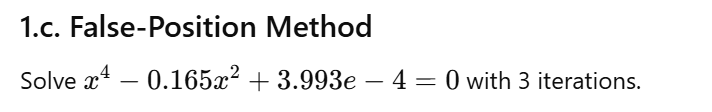

In [76]:
f = lambda x: x**4 - 0.165*x**2 + 3.993e-4
a,b = 0,0.5
table = []
for i in range(3):
    fa,fb = f(a),f(b)
    c = b - fb*(a-b)/(fa-fb)
    ea = abs((c - b)/c)*100
    table.append([i+1,a,b,c,ea])
    if fa*f(c) < 0: b=c
    else: a=c
print("False-Position Table")
for row in table: print(row)


False-Position Table
[1, 0, 0.5, -0.009395294117647057, 5421.813173052843]
[2, -0.009395294117647057, 0.5, -0.018611863562826625, 2786.4585500113344]
[3, -0.018611863562826625, 0.5, -0.02694254082343084, 1955.8012151740722]
